<a href="https://colab.research.google.com/github/ManG0A2/MLP-class/blob/main/9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9-3

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input ,train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras


model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=30, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
313/313 [==============================] - 15s 25ms/step - loss: 0.6926 - accuracy: 0.5321 - val_loss: 0.6917 - val_accuracy: 0.5714
Epoch 2/30
  9/313 [..............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.6024

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6901 - accuracy: 0.6086 - val_loss: 0.6872 - val_accuracy: 0.6442
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6690 - accuracy: 0.6683 - val_loss: 0.6393 - val_accuracy: 0.6736
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 0.6255 - accuracy: 0.6825 - val_loss: 0.6153 - val_accuracy: 0.6932
Epoch 5/30
313/313 [==============================] - 4s 12ms/step - loss: 0.6038 - accuracy: 0.7093 - val_loss: 0.5974 - val_accuracy: 0.7156
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5859 - accuracy: 0.7290 - val_loss: 0.5825 - val_accuracy: 0.7190
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 0.5714 - accuracy: 0.7408 - val_loss: 0.5696 - val_accuracy: 0.7334
Epoch 8/30
313/313 [==============================] - 3s 9ms/step - loss: 0.5578 - accuracy: 0.7498 - val_loss: 0.5643 - val_accuracy: 0.7354
Epoch 9/30
31

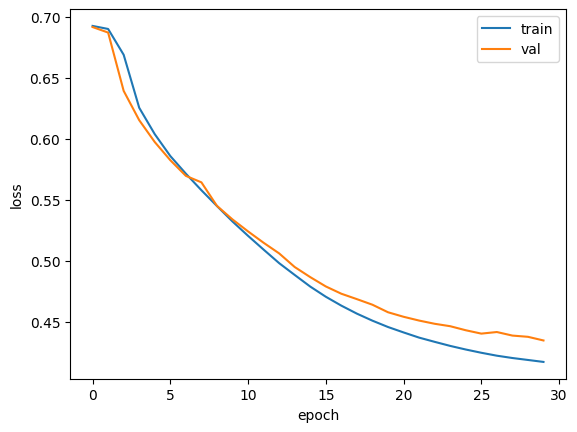

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=30, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
313/313 [==============================] - 10s 21ms/step - loss: 0.6928 - accuracy: 0.5142 - val_loss: 0.6924 - val_accuracy: 0.5478
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6919 - accuracy: 0.5515 - val_loss: 0.6914 - val_accuracy: 0.5726
Epoch 3/30
313/313 [==============================] - 3s 8ms/step - loss: 0.6905 - accuracy: 0.5811 - val_loss: 0.6898 - val_accuracy: 0.5912
Epoch 4/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6881 - accuracy: 0.5959 - val_loss: 0.6866 - val_accuracy: 0.6134
Epoch 5/30
313/313 [==============================] - 4s 13ms/step - loss: 0.6833 - accuracy: 0.6220 - val_loss: 0.6800 - val_accuracy: 0.6328
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6723 - accuracy: 0.6472 - val_loss: 0.6626 - val_accuracy: 0.6728
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6344 - accuracy: 0.6798 - val_loss: 0.6014 - val_accuracy: 0.7076
Epo

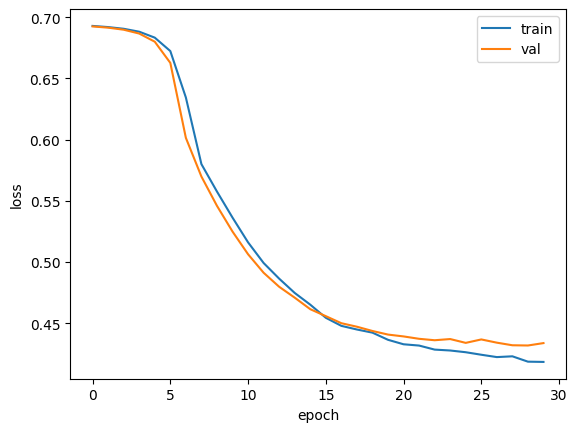

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [12]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=30, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
313/313 [==============================] - 11s 24ms/step - loss: 0.6929 - accuracy: 0.5129 - val_loss: 0.6925 - val_accuracy: 0.5712
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 0.6917 - accuracy: 0.5699 - val_loss: 0.6904 - val_accuracy: 0.6054
Epoch 3/30
313/313 [==============================] - 4s 13ms/step - loss: 0.6843 - accuracy: 0.6026 - val_loss: 0.6706 - val_accuracy: 0.6784
Epoch 4/30
313/313 [==============================] - 4s 13ms/step - loss: 0.6352 - accuracy: 0.6783 - val_loss: 0.6080 - val_accuracy: 0.6938
Epoch 5/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5924 - accuracy: 0.7057 - val_loss: 0.5762 - val_accuracy: 0.7166
Epoch 6/30
313/313 [==============================] - 4s 13ms/step - loss: 0.5612 - accuracy: 0.7266 - val_loss: 0.5416 - val_accuracy: 0.7432
Epoch 7/30
313/313 [==============================] - 4s 13ms/step - loss: 0.5341 - accuracy: 0.7456 - val_loss: 0.5194 - val_accuracy: 0.755

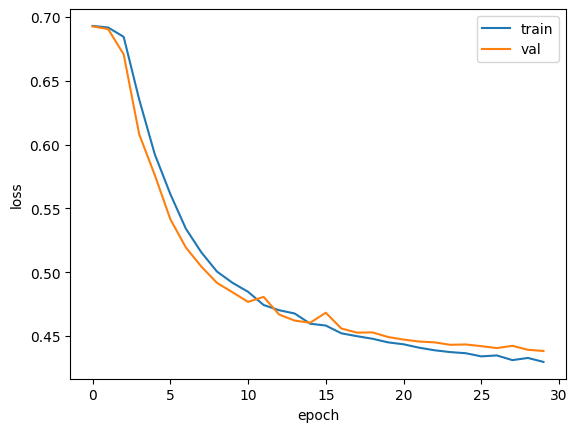

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))


In [17]:
model4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=30, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
313/313 [==============================] - 8s 16ms/step - loss: 0.6923 - accuracy: 0.5320 - val_loss: 0.6916 - val_accuracy: 0.5558
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6899 - accuracy: 0.5737 - val_loss: 0.6892 - val_accuracy: 0.5756
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 0.6864 - accuracy: 0.5992 - val_loss: 0.6853 - val_accuracy: 0.5930
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.6809 - accuracy: 0.6174 - val_loss: 0.6790 - val_accuracy: 0.5996
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6725 - accuracy: 0.6290 - val_loss: 0.6698 - val_accuracy: 0.6138
Epoch 6/30
313/313 [==============================] - 3s 8ms/step - loss: 0.6597 - accuracy: 0.6447 - val_loss: 0.6548 - val_accuracy: 0.6398
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6392 - accuracy: 0.6649 - val_loss: 0.6303 - val_accuracy: 0.6626
Epo